In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std
df = pd.read_csv('hansen_dwi.csv')

(214558, 16)
   Unnamed: 0.1  Unnamed: 0        Date  Alcohol1  Alcohol2  low_score  male  \
0             0           0  2007-07-30         0         0        0.0   1.0   
1             1           1  2007-02-20         0         0        0.0   1.0   
2             2           2  2003-03-18         0         0        0.0   1.0   
3             3           3  2006-12-17         0         0        0.0   1.0   
4             4           4  1999-04-07         0         0        0.0   1.0   

   white  recidivism  acc  aged    year  bac1  bac2  dui  agg_dui  
0    1.0         1.0  0.0  48.0  2007.0   0.0   0.0    0        0  
1    1.0         0.0  0.0  51.0  2007.0   0.0   0.0    0        0  
2    0.0         0.0  0.0  68.0  2003.0   0.0   0.0    0        0  
3    1.0         0.0  0.0  51.0  2006.0   0.0   0.0    0        0  
4    1.0         0.0  0.0  22.0  1999.0   0.0   0.0    0        0  


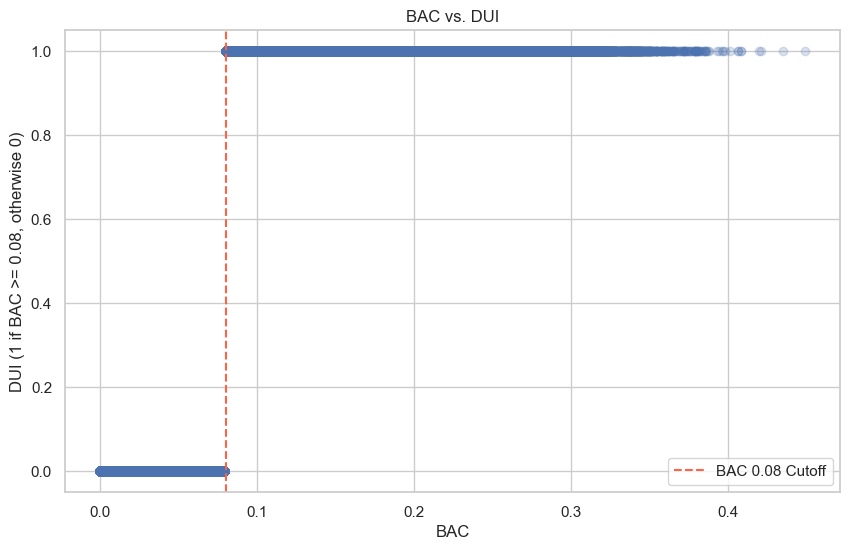

In [11]:
df['dui'] = (df['bac1'] >= 0.08).astype(int)
df['agg_dui'] = (df['bac1'] >= 0.15).astype(int)
print(df.shape)
print(df.head())
# Set the aesthetic style of the plots
sns.set_theme(style="whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))
plt.scatter(df['bac1'], df['dui'], alpha=0.2)
plt.axvline(x=0.08, linestyle='--', color='tomato', label='BAC 0.08 Cutoff')
plt.xlabel('BAC')
plt.ylabel('DUI (1 if BAC >= 0.08, otherwise 0)')
plt.title('BAC vs. DUI')
plt.legend()
plt.show()

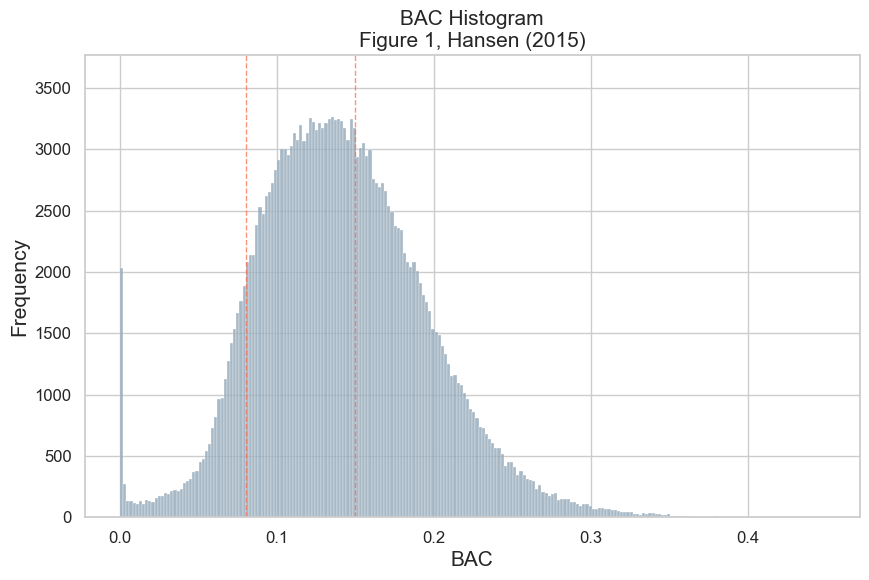

In [12]:
dwi = pd.read_csv('hansen_dwi.csv')

# Ensure seaborn's visual style is set
sns.set_theme(style="whitegrid")

# Create the histogram plot
plt.figure(figsize=(10, 6))
sns.histplot(dwi['bac1'], binwidth=0.002, color="#8aa1b4", kde=False)

# Add vertical lines at the specified x intercepts
plt.axvline(x=0.08, linewidth=1, linestyle='--', color='tomato', alpha=0.7)
plt.axvline(x=0.15, linewidth=1, linestyle='--', color='tomato', alpha=0.7)

# Set labels and title
plt.xlabel('BAC', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('BAC Histogram\nFigure 1, Hansen (2015)', fontsize=15)

# Adjust y-axis limits for additional space at the top
plt.ylim(0, plt.ylim()[1] * 1.1)

# Customize tick label font sizes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Set background color
plt.gca().set_facecolor('white')
plt.grid(True)

# Display the plot
plt.show()


In [13]:
data = pd.read_csv('hansen_dwi.csv')

# Define the outcomes and predictors based on user's dataset structure
outcomes = ['male', 'white', 'aged', 'acc']
predictors = ['dui', 'agg_dui']

# Function to run linear regression and return coefficients and standard errors
def run_regression(data, outcome, predictor):
    formula = f"{outcome} ~ {predictor}"
    model = smf.ols(formula, data=data).fit()
    coef = model.params[predictor]
    se = model.bse[predictor]
    return coef, se

# Prepare to store results
results = []

# Compute the regression results for each outcome and predictor
for outcome in outcomes:
    dui_coef, dui_se = run_regression(data, outcome, 'dui')
    agg_dui_coef, agg_dui_se = run_regression(data, outcome, 'agg_dui')
    results.append({
        'Characteristic': outcome.capitalize(),
        'DUI Coef.': f"{dui_coef:.3f}",
        'DUI SE': f"({dui_se:.3f})",
        'Agg DUI Coef.': f"{agg_dui_coef:.3f}",
        'Agg DUI SE': f"({agg_dui_se:.3f})"
    })

# Convert results to a DataFrame for better display
results_df = pd.DataFrame(results)
results_df

,Characteristic,DUI Coef.,DUI SE,Agg DUI Coef.,Agg DUI SE
0,Male,0.004,(0.003),-0.005,(0.002)
1,White,0.020,(0.002),0.018,(0.002)
2,Aged,-0.632,(0.082),1.546,(0.050)
3,Acc,0.033,(0.003),0.086,(0.002)


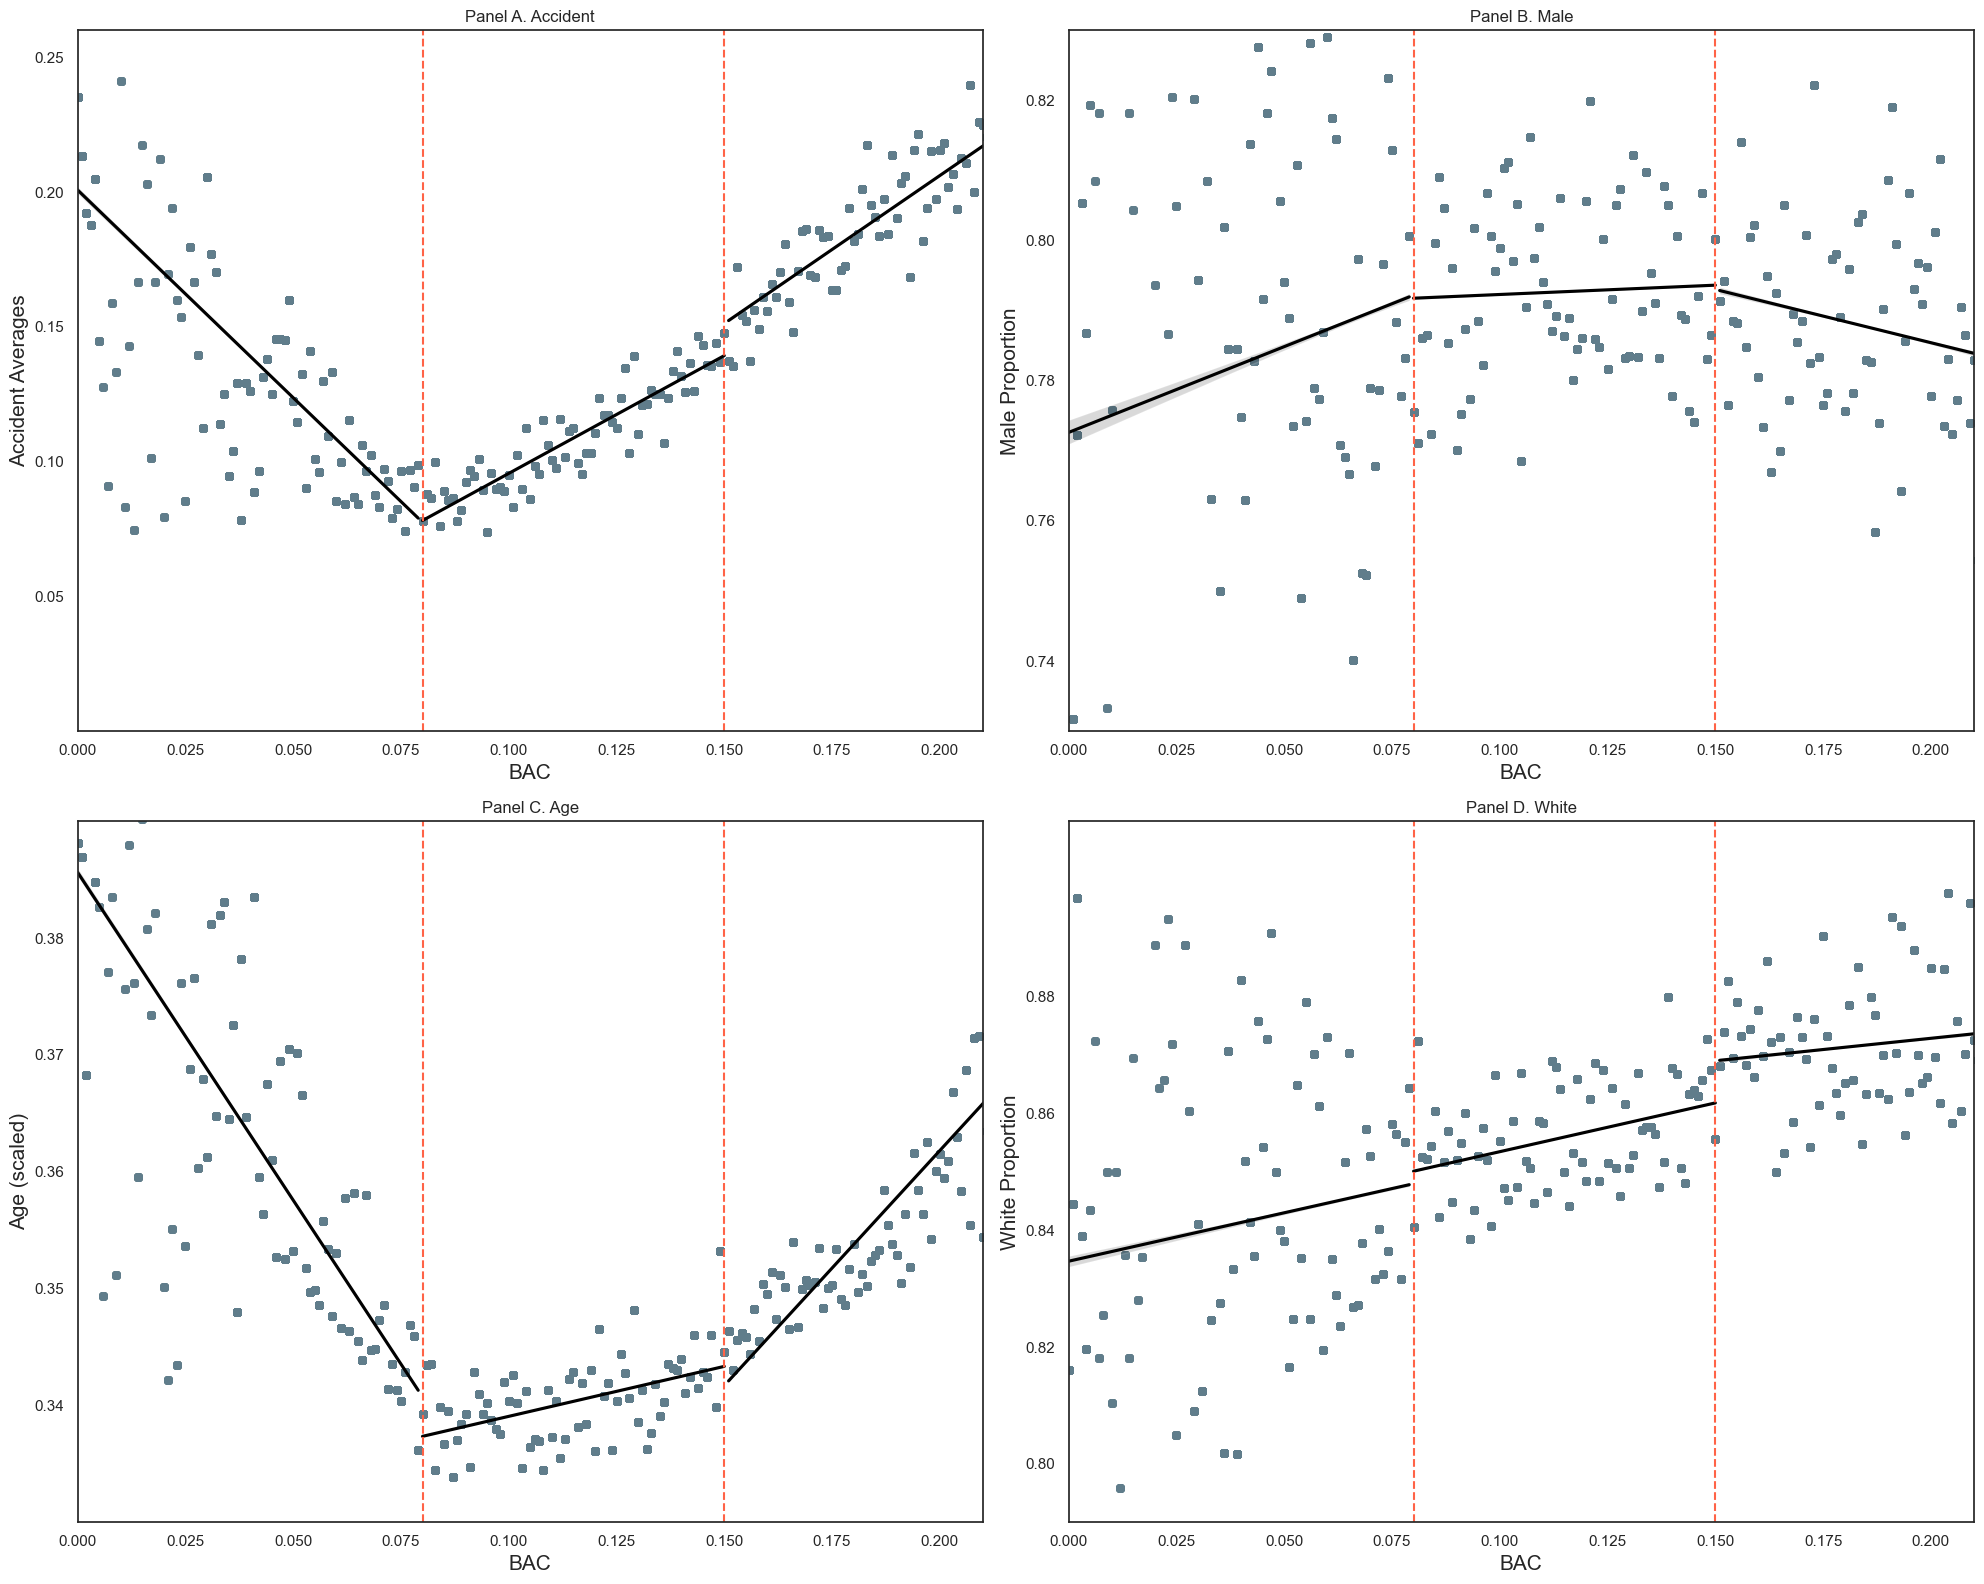

In [14]:
# Load your data
data = pd.read_csv('hansen_dwi.csv')

# Preprocess data for all plots
# Calculate averages and adjust DUI categories
characteristics = ['acc', 'male', 'aged', 'white']
for char in characteristics:
    data[f'avg_{char}'] = data.groupby('bac1')[char].transform(lambda x: x.mean() / 100 if char == 'aged' else x.mean())
data['dui_adjusted'] = np.where(data['bac1'] > 0.15, 2, data['dui'])

# Set up the plotting environment
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Create the subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 16))
axes = axes.flatten()
color_map = {0: "#607d8b", 1: "#607d8b", 2: "#607d8b"}

# Titles and y-limits for each subplot
titles = ['Panel A. Accident', 'Panel B. Male', 'Panel C. Age', 'Panel D. White']
ylabs = ['Accident Averages', 'Male Proportion', 'Age (scaled)', 'White Proportion']
ylimits = [(0, 0.26), (0.73, 0.83), (0.33, 0.39), (0.79, 0.91)]
yticks = [(0.05, 0.1, 0.15, 0.2, 0.25), (0.74, 0.76, 0.78, 0.8, 0.82), 
          (0.34, 0.35, 0.36, 0.37, 0.38), (0.80, 0.82, 0.84, 0.86, 0.88)]

for i, char in enumerate(characteristics):
    ax = axes[i]
    for dui_cat in data['dui_adjusted'].unique():
        subset = data[data['dui_adjusted'] == dui_cat]
        sns.scatterplot(x='bac1', y=f'avg_{char}', data=subset, alpha=0.3,
                        color=color_map[dui_cat], edgecolor=None, ax=ax)
        sns.regplot(x='bac1', y=f'avg_{char}', data=subset, scatter=False, 
                    line_kws={'color': 'black'}, ax=ax)
    
    # Add vertical lines for DUI thresholds
    ax.axvline(x=0.08, color='tomato', linestyle='--')
    ax.axvline(x=0.15, color='tomato', linestyle='--')

    # Set axis limits and ticks
    ax.set_xlim(0, 0.21)
    ax.set_ylim(*ylimits[i])
    ax.set_yticks(np.linspace(yticks[i][0], yticks[i][-1], num=5))  # Correctly unpack the range and number of ticks
    ax.set_xlabel('BAC', fontsize=15)
    ax.set_ylabel(ylabs[i], fontsize=15)
    ax.set_title(titles[i])

# Adjust subplot layout
plt.tight_layout()

# Remove all legends
for ax in axes:
    ax.legend([], [], frameon=False)

plt.show()


In [15]:
# Load the data
data = pd.read_csv('hansen_dwi.csv')

# Prepare the data by adding necessary columns
data['dui'] = (data['bac1'] >= 0.08).astype(int)  # 1 if BAC > 0.08, 0 otherwise
data['bac_rescaled'] = data['bac1'] - 0.08  # Rescale BAC around the 0.08 threshold

# Define a bandwidth for focused analysis around the threshold
bandwidth = 0.05  # Bandwidth of 0.05 on either side of the threshold
data = data[(data['bac1'] >= 0.08 - bandwidth) & (data['bac1'] <= 0.08 + bandwidth)]

# Ensure all required variables (columns) are present and correctly named
# Check for presence of all variables used in the formula
expected_columns = ['recidivism', 'dui', 'bac_rescaled', 'year', 'aged', 'white', 'male', 'acc']
missing_columns = [col for col in expected_columns if col not in data.columns]
if missing_columns:
    raise ValueError(f"Missing columns in the dataset: {missing_columns}")

# Regression formula
formula = 'recidivism ~ dui + bac_rescaled + dui:bac_rescaled + year + aged + white + male + acc'

# Fit the regression model
model = smf.ols(formula, data=data).fit()

# Extract coefficients, standard errors, and p-values
coef_dui = model.params['dui']
std_err_dui = model.bse['dui']
p_value_dui = model.pvalues['dui']

# Printing the results
print(f"RDD Estimate of the Effect of Exceeding the 0.08 BAC Threshold on Recidivism: {coef_dui:.3f}")
print(f"Standard Error: {std_err_dui:.3f}")
print(model.summary())



RDD Estimate of the Effect of Exceeding the 0.08 BAC Threshold on Recidivism: -0.024
Standard Error: 0.004
                            OLS Regression Results                            
Dep. Variable:             recidivism   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     46.24
Date:                Mon, 29 Apr 2024   Prob (F-statistic):           7.41e-75
Time:                        13:18:11   Log-Likelihood:                -21849.
No. Observations:               90074   AIC:                         4.372e+04
Df Residuals:                   90065   BIC:                         4.380e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------

In [16]:
# Load the data
data = pd.read_csv('hansen_dwi.csv')

# Prepare the data
data['dui'] = (data['bac1'] >= 0.15).astype(int)  # 1 if BAC > 0.15, 0 otherwise
data['bac_rescaled'] = data['bac1'] - 0.15  # Rescale BAC around the 0.15 threshold

# Optionally apply a bandwidth for focused analysis around the 0.15 threshold
bandwidth = 0.05  # Bandwidth of 0.05 on either side of the threshold
data = data[(data['bac1'] >= 0.15 - bandwidth) & (data['bac1'] <= 0.15 + bandwidth)]

# Ensure all required variables (columns) are present and correctly named
expected_columns = ['recidivism', 'dui', 'bac_rescaled', 'year', 'aged', 'white', 'male', 'acc']
missing_columns = [col for col in expected_columns if col not in data.columns]
if missing_columns:
    raise ValueError(f"Missing columns in the dataset: {missing_columns}")

# Regression formula
formula = 'recidivism ~ dui + bac_rescaled + dui:bac_rescaled + year + aged + white + male + acc'

# Fit the regression model
model = smf.ols(formula, data=data).fit()

# Extract coefficients, standard errors, and p-values
coef_dui = model.params['dui']
std_err_dui = model.bse['dui']
p_value_dui = model.pvalues['dui']

# Printing the results
print(f"RDD Estimate of the Effect of Exceeding the 0.15 BAC Threshold on Recidivism: {coef_dui:.3f}")
print(f"Standard Error: {std_err_dui:.3f}")
print(model.summary())



RDD Estimate of the Effect of Exceeding the 0.15 BAC Threshold on Recidivism: -0.006
Standard Error: 0.003
                            OLS Regression Results                            
Dep. Variable:             recidivism   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     56.55
Date:                Mon, 29 Apr 2024   Prob (F-statistic):           1.63e-92
Time:                        13:18:12   Log-Likelihood:                -38556.
No. Observations:              139663   AIC:                         7.713e+04
Df Residuals:                  139654   BIC:                         7.722e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------

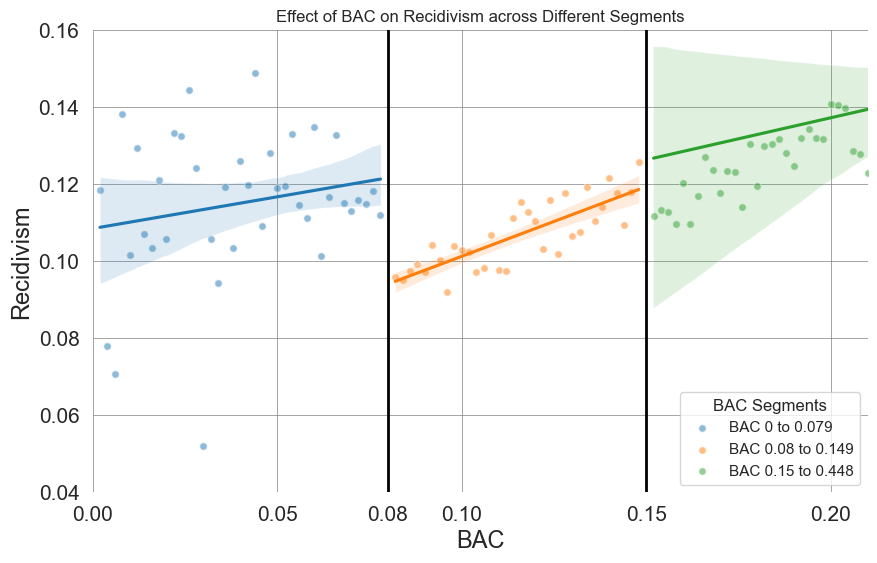

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load data
data = pd.read_csv('hansen_dwi.csv')

# Define bin width and create a new column for binned BAC levels
bin_width = 0.002
data['bac1_bin'] = (data['bac1'] // bin_width) * bin_width

# Calculate the average recidivism for each bin
binned_data = data.groupby('bac1_bin')['recidivism'].mean().reset_index()

# Define the BAC segments
segments = [(0, 0.079), (0.08, 0.149), (0.15, np.max(binned_data['bac1_bin']))]

# Setup the plot
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Initialize a list to store handles for the legend
handles = []

# Plot each segment with a different regression line and scatter points
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Different colors for each segment
for i, (lower, upper) in enumerate(segments):
    # Filter binned data for the current segment
    segment_data = binned_data[(binned_data['bac1_bin'] > lower) & (binned_data['bac1_bin'] <= upper)]

    # Plot scatter points for binned averages
    scatter = plt.scatter(segment_data['bac1_bin'], segment_data['recidivism'], alpha=0.5, 
                          color=colors[i], s=30, edgecolor='w', label=f'BAC {lower} to {upper}')
    handles.append(scatter)  # Add scatter to handles for the legend

    # Fit and plot regression model using the binned data
    line = sns.regplot(x='bac1_bin', y='recidivism', data=segment_data, scatter=False, 
                       line_kws={'color': colors[i]},
                       truncate=True)

# Vertical lines at thresholds
plt.axvline(x=0.08, color='black', linestyle='-', lw=2)
plt.axvline(x=0.15, color='black', linestyle='-', lw=2)

# Axes limits and breaks
plt.xlim(0, 0.21)
plt.ylim(0.04, 0.16)  # Adjust y-limits to fit the range of recidivism
plt.xticks([0, 0.05, 0.08, 0.10, 0.15, 0.20], fontsize=15)
plt.yticks(fontsize=15)

# Labels and title
plt.xlabel('BAC', fontsize=17)
plt.ylabel('Recidivism', fontsize=17)
plt.title('Effect of BAC on Recidivism across Different Segments')

# Create the legend from the handles
plt.legend(handles=handles, title='BAC Segments')

# Grid and box styling
plt.grid(True, which='major', linestyle='-', linewidth='0.5', color='grey')
plt.box(False)

# Show plot
plt.show()


In [18]:
# New RDD calculations using optimized thresholds
# Load the data
data = pd.read_csv('hansen_dwi.csv')

# Prepare the data by adding necessary columns
data['dui'] = (data['bac1'] >= 0.08).astype(int)  # 1 if BAC > 0.08, 0 otherwise
data['bac_rescaled'] = data['bac1'] - 0.08  # Rescale BAC around the 0.08 threshold

# Define a bandwidth for focused analysis around the threshold
bandwidth = 0.028  
data = data[(data['bac1'] >= 0.08 - bandwidth) & (data['bac1'] <= 0.08 + bandwidth)]

# Ensure all required variables (columns) are present and correctly named
# Check for presence of all variables used in the formula
expected_columns = ['recidivism', 'dui', 'bac_rescaled', 'year', 'aged', 'white', 'male', 'acc']
missing_columns = [col for col in expected_columns if col not in data.columns]
if missing_columns:
    raise ValueError(f"Missing columns in the dataset: {missing_columns}")

# Regression formula
formula = 'recidivism ~ dui + bac_rescaled + dui:bac_rescaled + year + aged + white + male + acc'

# Fit the regression model
model = smf.ols(formula, data=data).fit()

# Extract coefficients, standard errors, and p-values
coef_dui = model.params['dui']
std_err_dui = model.bse['dui']
p_value_dui = model.pvalues['dui']

# Printing the results
print(f"RDD Estimate of the Effect of Exceeding the 0.08 BAC Threshold on Recidivism: {coef_dui:.3f}")
print(f"Standard Error: {std_err_dui:.3f}")
print(model.summary())


RDD Estimate of the Effect of Exceeding the 0.08 BAC Threshold on Recidivism: -0.016
Standard Error: 0.006
                            OLS Regression Results                            
Dep. Variable:             recidivism   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     28.53
Date:                Mon, 29 Apr 2024   Prob (F-statistic):           8.67e-45
Time:                        13:18:14   Log-Likelihood:                -12116.
No. Observations:               52167   AIC:                         2.425e+04
Df Residuals:                   52158   BIC:                         2.433e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------

In [19]:
# Load the data
data = pd.read_csv('hansen_dwi.csv')

# Prepare the data
data['dui'] = (data['bac1'] >= 0.15).astype(int)  # 1 if BAC > 0.15, 0 otherwise
data['bac_rescaled'] = data['bac1'] - 0.15  # Rescale BAC around the 0.15 threshold

# Optionally apply a bandwidth for focused analysis around the 0.15 threshold
bandwidth = 0.028  # Bandwidth of 0.05 on either side of the threshold
data = data[(data['bac1'] >= 0.15 - bandwidth) & (data['bac1'] <= 0.15 + bandwidth)]

# Ensure all required variables (columns) are present and correctly named
expected_columns = ['recidivism', 'dui', 'bac_rescaled', 'year', 'aged', 'white', 'male', 'acc']
missing_columns = [col for col in expected_columns if col not in data.columns]
if missing_columns:
    raise ValueError(f"Missing columns in the dataset: {missing_columns}")

# Regression formula
formula = 'recidivism ~ dui + bac_rescaled + dui:bac_rescaled + year + aged + white + male + acc'

# Fit the regression model
model = smf.ols(formula, data=data).fit()

# Extract coefficients, standard errors, and p-values
coef_dui = model.params['dui']
std_err_dui = model.bse['dui']
p_value_dui = model.pvalues['dui']

# Printing the results
print(f"RDD Estimate of the Effect of Exceeding the 0.15 BAC Threshold on Recidivism: {coef_dui:.3f}")
print(f"Standard Error: {std_err_dui:.3f}")
print(model.summary())

RDD Estimate of the Effect of Exceeding the 0.15 BAC Threshold on Recidivism: -0.004
Standard Error: 0.004
                            OLS Regression Results                            
Dep. Variable:             recidivism   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     27.33
Date:                Mon, 29 Apr 2024   Prob (F-statistic):           8.69e-43
Time:                        13:18:14   Log-Likelihood:                -23577.
No. Observations:               84708   AIC:                         4.717e+04
Df Residuals:                   84699   BIC:                         4.726e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------